# NumPy Basics: Arrays and Vectorized Computation

Here are some things you'll find in NumPy:
- `ndarray`, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities.
- Mathematical functions for fast operations on entire arrays of data without having to write loops.
- Tools for reading/writing array data to disk and working with memory-mapped files.
- Linear algebra, random number generation, and Fourier transform capabilities.

Numpy is important for numerical computation in Python because it is desgined for efficiency on large arrays of data. It is also the foundation for many other packages in the scientific Python ecosystem, such as pandas, scikit-learn, and matplotlib.

In [1]:
# import numpy
import numpy as np

In [2]:
my_arr = np.arange(1_000_000)
%timeit my_arr2 = my_arr * 2

2.77 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
my_list = list(range(1_000_000))
%timeit my_list2 = [x * 2 for x in my_list]

98.9 ms ± 6.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


NumPy algorithms are generally 10 to 100 times faster that their pure Python counterparts and use significantly less memory.

A ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array.

In [4]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [5]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [6]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [7]:
data.shape

(2, 3)

In [8]:
data.dtype

dtype('float64')

In [9]:
# produce an array of all 0s.
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
np.zeros((4, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [11]:
# creates an array without initializing its values.
np.empty(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# creates an array of 1s.
np.ones((3, 6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [13]:
# create a square N x N identity matrix.
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [14]:
np.identity(2)

array([[1., 0.],
       [0., 1.]])

In [15]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [16]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

Arrays are important because they enable you to express batch operations on data without writing any for loops. This is called vectorization. Any arithmetic operations between equal-size arrays applies the operation element-wise.

In [17]:
arr = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [18]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [19]:
arr**2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [20]:
other_ar = np.array([[0.0, 4.0, 1.0], [7.0, 2.0, 12.0]])
arr > other_ar

array([[ True, False,  True],
       [False,  True, False]])

In [21]:
arr[1]

array([4., 5., 6.])

In [22]:
# select a row, then select a column
arr[0, 2]

3.0

In [23]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [24]:
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [25]:
# comparison is also vectorized
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [26]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

In [27]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [28]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [29]:
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [30]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [31]:
arr = np.zeros((8, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [32]:
for i in range(8):
    arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [33]:
# to select a subset of the rows in a particular order you can simply pass a list or ndarray of integers specifying the desired order.
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [34]:
# you can use negative indices to select rows from the end of the array.
arr[[-3, -5, -7]]
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [35]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [36]:
# passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices.
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [37]:
# inner matrix product
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
np.dot(arr.T, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [38]:
# inner matriz product using the @ operator
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [39]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [40]:
# transpose a pair of axis
arr.transpose((1, 0))

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

The numpy.random module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions.

In [41]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.71583622, -0.49992516, -0.1676995 , -0.30354657],
       [-0.41641322, -1.21617004,  0.91816025,  1.20039394],
       [-0.89492656,  0.13060455,  0.62113194, -0.45524486],
       [ 0.2613668 , -0.17840194,  0.44577533,  0.52900352]])

Python's built-in random module, by contrast, only samples one value at a time. As you can see, numpy.random is well-suited for performing a large number of random draws from a statistical distribution.

In [42]:
from random import normalvariate

N = 1_000_000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]

954 ms ± 46.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%timeit np.random.normal(size=N)

28.9 ms ± 970 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
rng = np.random.default_rng(seed=424216)
rng

Generator(PCG64) at 0x7F75C47049E0

In [45]:
data = rng.standard_normal((2, 3))
data

array([[ 0.13487265, -0.60972081, -0.67881105],
       [-0.5505619 , -0.69574928,  1.06887609]])

In [46]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)

In [47]:
x

array([-0.07033744, -1.83520343,  0.26198689, -0.2212973 , -0.0040696 ,
       -0.05736764,  0.09145242,  1.13717777])

In [48]:
y

array([-0.28404948,  1.24799407,  0.087421  ,  1.19373651, -0.43083199,
        0.79551554,  0.07386965,  0.4305171 ])

In [49]:
# element-wise maximum
np.maximum(x, y)

array([-0.07033744,  1.24799407,  0.26198689,  1.19373651, -0.0040696 ,
        0.79551554,  0.09145242,  1.13717777])

Using NumPy arrays makes it possible to express many kinds of data processing tasks as concise array expressions that can often be carried out without any for loops, leading to much cleaner and faster Python code.

In [50]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [51]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

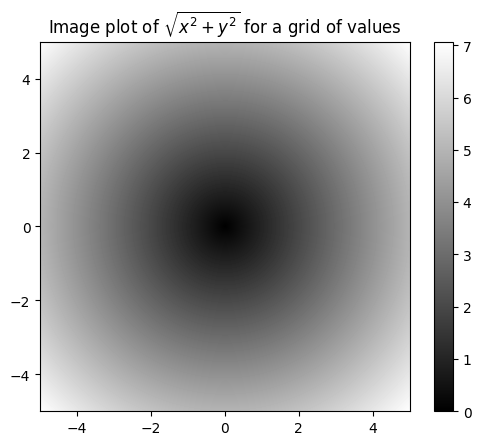

In [52]:
# use matplotlib to plot this two-dimensional array
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [53]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

In [54]:
# ternary expression
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [55]:
# ternary expression using np.where. The second and third arguments to np.where don’t need to be arrays
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [56]:
arr = rng.standard_normal((5, 4))
arr

array([[ 0.49123075,  0.49642337,  0.12773258, -0.01620528],
       [-0.54997534,  1.41735958, -2.46056233, -1.11717312],
       [ 0.23669668, -0.03597187,  0.34258503, -0.85078154],
       [ 0.46207917,  1.0158616 ,  0.09935922,  0.29697199],
       [ 0.79758026,  0.45033121,  1.14467374, -0.51046287]])

In [57]:
arr.mean()

0.09188764069312774

In [58]:
np.mean(arr)

0.09188764069312774

In [59]:
arr.sum()

1.8377528138625547

In [60]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [61]:
arr = rng.standard_normal(100)
(arr > 0).sum()  # Number of positive values

51

In [62]:
(arr <= 0).sum()  # Number of negative values

49

In [63]:
bools = np.array([False, False, True, False])

In [64]:
bools.any()

True

In [65]:
bools.all()

False

In [66]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [67]:
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
y = np.array([[6.0, 23.0], [-1, 7], [8, 9]])
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [68]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [69]:
from numpy.linalg import inv, qr

X = rng.standard_normal((5, 5))

In [70]:
mat = X.T @ X
mat

array([[ 5.9080893 , -2.98159697, -1.34160032, -1.82588304, -1.42960831],
       [-2.98159697,  5.27329783, -2.07071986,  2.85207333,  1.43004201],
       [-1.34160032, -2.07071986,  4.96373871, -3.73784545, -0.63804095],
       [-1.82588304,  2.85207333, -3.73784545,  5.41338822,  0.11710506],
       [-1.42960831,  1.43004201, -0.63804095,  0.11710506,  1.93711507]])

In [71]:
inv(mat)

array([[11.40554147,  2.64449806, 15.06220791, 12.62321754, 10.66316437],
       [ 2.64449806,  0.97491328,  3.44469215,  2.70917035,  2.20277392],
       [15.06220791,  3.44469215, 20.34746637, 17.00683734, 14.24692506],
       [12.62321754,  2.70917035, 17.00683734, 14.49750084, 12.04128636],
       [10.66316437,  2.20277392, 14.24692506, 12.04128636, 10.72425462]])

In [72]:
mat @ inv(mat)

array([[ 1.00000000e+00,  4.46824984e-16,  1.30784828e-14,
         5.14075946e-15,  9.33105054e-15],
       [ 4.09251286e-15,  1.00000000e+00, -4.70170273e-15,
         4.45407251e-15, -6.32414536e-15],
       [ 5.24157631e-15, -4.87086695e-16,  1.00000000e+00,
         1.85428736e-15,  2.48327815e-15],
       [-1.61824952e-15,  1.59300848e-15,  2.22171517e-15,
         1.00000000e+00, -3.16708131e-15],
       [ 1.78308919e-15, -4.10075894e-16, -2.01961734e-16,
         1.87572335e-15,  1.00000000e+00]])

In [73]:
import random

position = 0
walk = [position]
steps = 1000

for _ in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

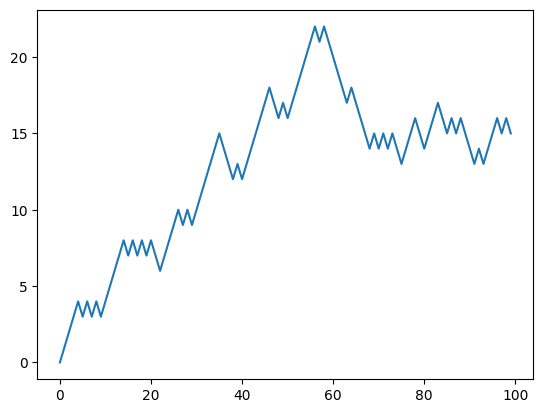

In [74]:
plt.plot(walk[:100])

In [75]:
steps = 1000
rng = np.random.default_rng(seed=424216)
draws = rng.integers(0, 2, size=steps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [76]:
walk.max()

38

In [77]:
walk.min()

-13

In [78]:
(np.abs(walk) >= 10).argmax()

197

In [79]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[ -1,   0,  -1, ..., -20, -21, -20],
       [ -1,  -2,  -3, ...,  22,  23,  22],
       [ -1,  -2,  -1, ...,  64,  65,  66],
       ...,
       [  1,   2,   1, ..., -34, -33, -34],
       [ -1,   0,  -1, ...,  32,  33,  34],
       [  1,   2,   1, ..., -50, -49, -50]])

In [80]:
walks.max()

115

In [81]:
walks.min()

-121

In [82]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([ True,  True,  True, ...,  True,  True,  True])

In [83]:
hits30.sum()

3400

In [84]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([461, 795, 441, ..., 737, 275, 527])

In [85]:
crossing_times.mean()

509.1976470588235